<a href="https://colab.research.google.com/github/gabrielamedeirosds/Analise_de_voos/blob/main/Analise_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a base de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import datetime, warnings, scipy 

from sklearn.model_selection import train_test_split


In [2]:
voos = pd.read_csv('flights.csv')
companhias = pd.read_csv('airlines.csv')

### Descrição das Variáveis 


* **YEAR:** Ano 
* **MONTH:** Mês 
* **DAY:** Dia
* **DAY_OF_WEEK:** Dia da semana
* **AIRLINE:** Airline Identifier
* **FLIGHT_NUMBER:** Flight Identifier
* **TAIL_NUMBER:** Aircraft Identifier
* **ORIGIN_AIRPORT:** Starting Airport
* **DESTINATION_AIRPORT:** Destination Airport
* **SCHEDULED_DEPARTURE :** Planned Departure Time
* **DEPARTURE_TIME:** Real Departure Time (in minutes)
* **DEPARTURE_DELAY:** Departure Delay (in minutes)
* **ARRIVAL_TIME:** Real arrival time 
* **ARRIVAL_DELAY:** Arrival Delay (in minutes)
* **DISTANCE:** distance (miles)





In [3]:
voos.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1.0,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1.0,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1.0,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1.0,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1.0,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1.0,1.0,4.0,DL,806.0,N3730B,SFO,MSP,25.0,...,610.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1.0,1.0,4.0,NK,612.0,N635NK,LAS,MSP,25.0,...,509.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1.0,1.0,4.0,US,2013.0,N584UW,LAX,CLT,30.0,...,753.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1.0,1.0,4.0,AA,1112.0,N3LAAA,SFO,DFW,30.0,...,532.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1.0,1.0,4.0,DL,1173.0,N826DN,LAS,ATL,30.0,...,656.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [5]:
voos.shape

(124368, 31)

##Classificando Voos

In [6]:
#Categorizando voos atrasados e não atrasados

resultado_atraso = []

for i in voos['ARRIVAL_DELAY']:
    
  if i > 10:
    resultado_atraso.append(1)
  else:
    resultado_atraso.append(0) 


In [7]:
#Criando uma coluna para o resultado da checagem de atraso

voos['RESULTADO_ATRASO'] = resultado_atraso

In [8]:
#Numero de voos por companhia aerea

numeros_voos = voos['AIRLINE'].value_counts()

In [9]:
numeros_voos = numeros_voos.rename('VOOS_TOTAIS')
numeros_voos

WN    26368
DL    16493
EV    13565
OO    12969
AA    11654
UA    10444
US     8739
MQ     7863
B6     5742
AS     3487
NK     2219
F9     1896
HA     1647
VX     1281
Name: VOOS_TOTAIS, dtype: int64

In [10]:
companhias = companhias.set_index(['IATA_CODE'], drop=True)
companhias.head()

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [11]:
companhias = pd.concat([companhias, numeros_voos], axis=1)
companhias.head()

,AIRLINE,VOOS_TOTAIS
UA,United Air Lines Inc.,10444
AA,American Airlines Inc.,11654
US,US Airways Inc.,8739
F9,Frontier Airlines Inc.,1896
B6,JetBlue Airways,5742


In [12]:
#Numero total de voos não atrasados e atrasados
voos['RESULTADO_ATRASO'].value_counts()

0    77796
1    46572
Name: RESULTADO_ATRASO, dtype: int64

In [13]:
#Variavel que armazena todos os voos atrasados 

voos_atrasados = voos[voos['RESULTADO_ATRASO']==1]

In [14]:
#Variavel que armazena o Numero total de voos atrasados por companhia aerea

voos_companhia = voos_atrasados['AIRLINE'].value_counts()

In [15]:
voos_companhia = voos_companhia.rename('VOOS_ATRASADOS')
voos_companhia

WN    10744
EV     5282
AA     4937
OO     4911
UA     4319
MQ     4098
DL     3821
US     2738
B6     2167
NK     1080
F9      984
AS      781
HA      446
VX      264
Name: VOOS_ATRASADOS, dtype: int64

In [16]:
companhias = pd.concat([companhias, voos_companhia], axis=1)
companhias.head()

,AIRLINE,VOOS_TOTAIS,VOOS_ATRASADOS
UA,United Air Lines Inc.,10444,4319
AA,American Airlines Inc.,11654,4937
US,US Airways Inc.,8739,2738
F9,Frontier Airlines Inc.,1896,984
B6,JetBlue Airways,5742,2167


In [17]:
#Relação Numero total de voos de cada companhia por numero total de voos atrasados de cada companhia
companhias['TAXA_ATRASO'] = companhias.apply(lambda row: (row['VOOS_ATRASADOS']/row['VOOS_TOTAIS'])*100, axis=1)

In [18]:
#Porcentagem de Atraso de cada companhia aérea
companhias

,AIRLINE,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
UA,United Air Lines Inc.,10444,4319,41.353887
AA,American Airlines Inc.,11654,4937,42.363137
US,US Airways Inc.,8739,2738,31.330816
F9,Frontier Airlines Inc.,1896,984,51.898734
B6,JetBlue Airways,5742,2167,37.739464
OO,Skywest Airlines Inc.,12969,4911,37.867222
AS,Alaska Airlines Inc.,3487,781,22.397476
NK,Spirit Air Lines,2219,1080,48.670572
WN,Southwest Airlines Co.,26368,10744,40.746359
DL,Delta Air Lines Inc.,16493,3821,23.167404


No gráfico abaixo é possivel visualizar a relação entre os voos totais e os voos atrasados

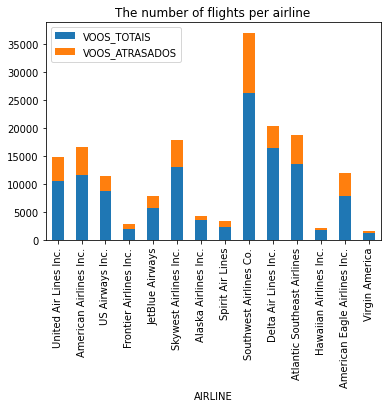

In [19]:
#Análise da relação entre os voos totais de cada empresa e os voos atrasados

companhias[['AIRLINE','VOOS_TOTAIS','VOOS_ATRASADOS']].plot.bar(x='AIRLINE', stacked=True, title='The number of flights per airline')

No gráfico abaixo está evidenciado o percentual de atraso por companhia aérea

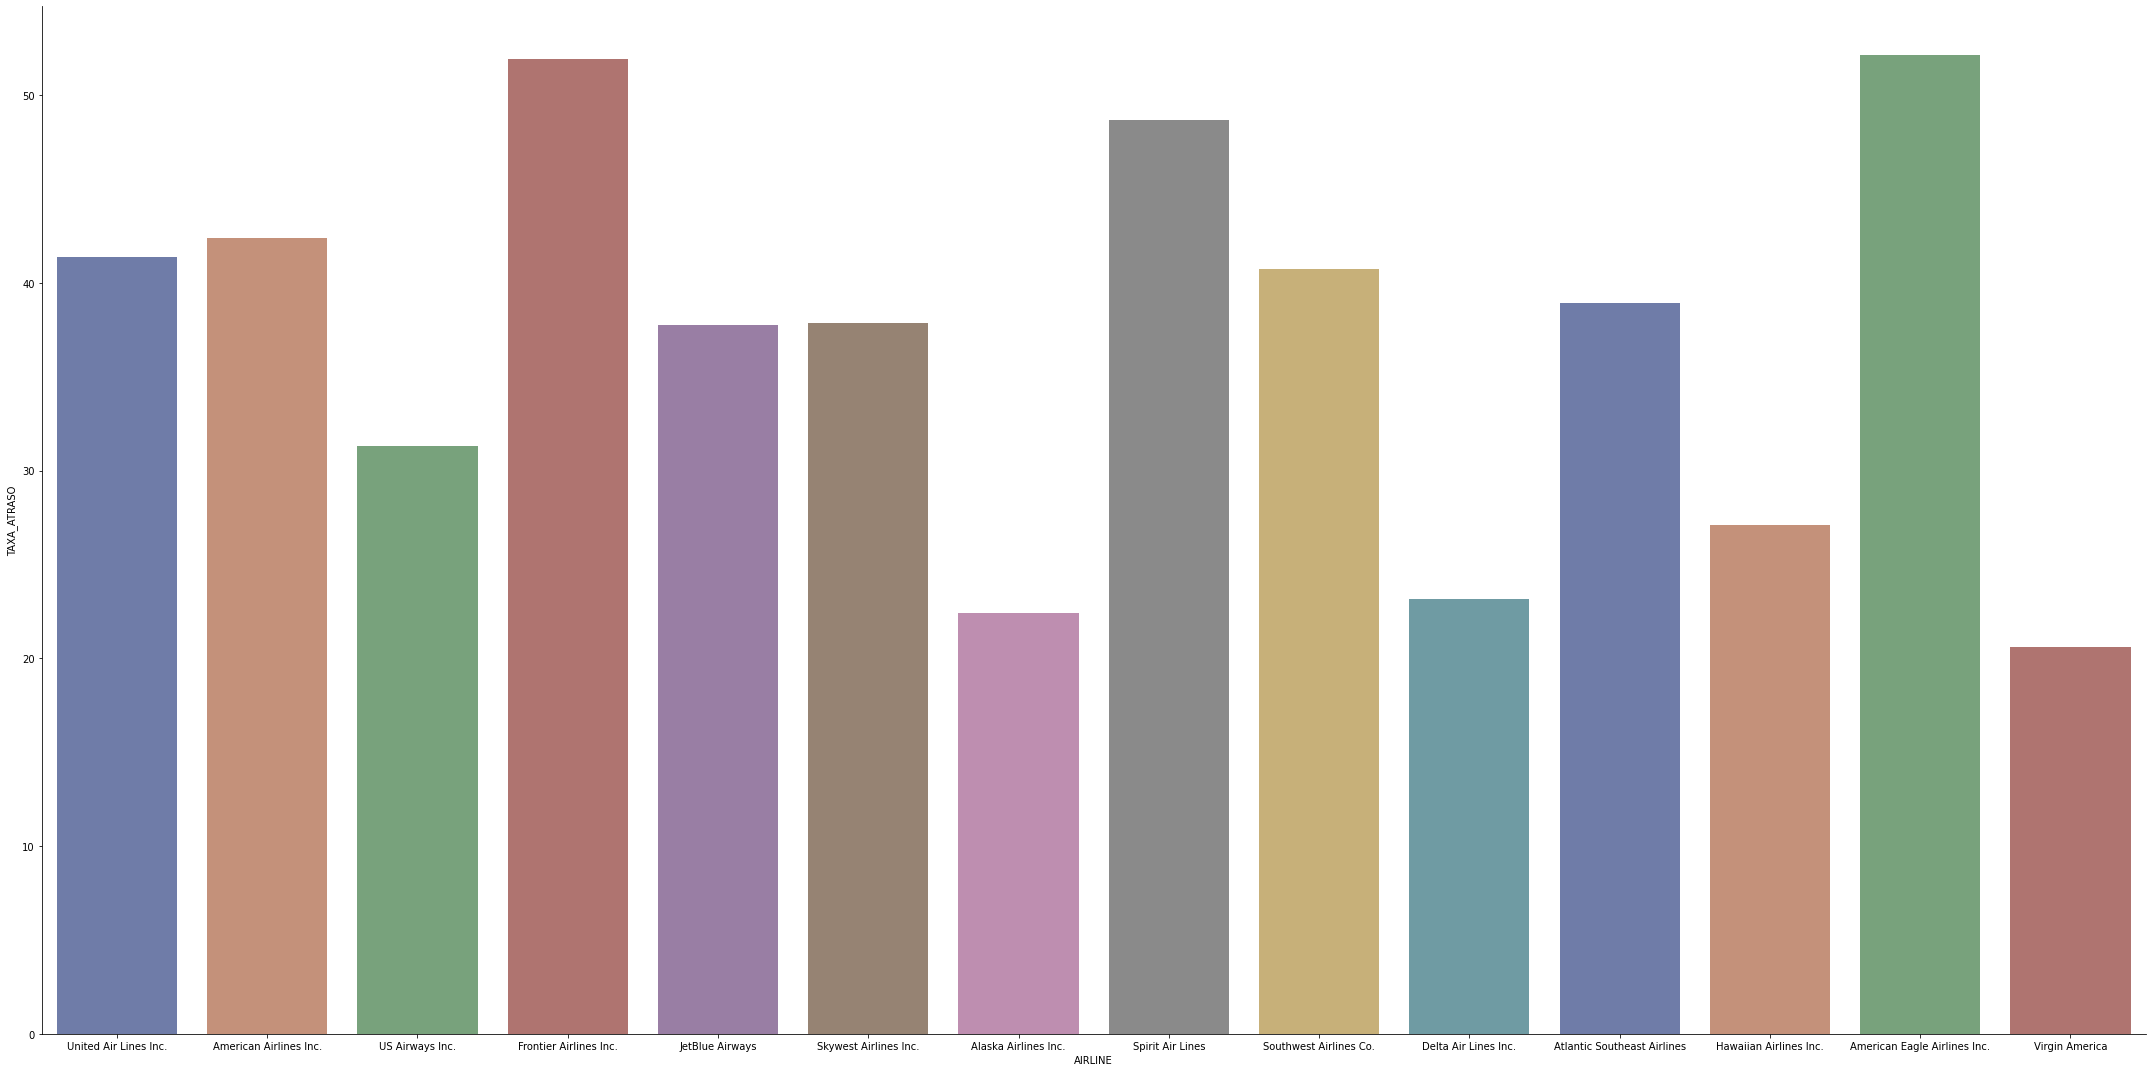

In [20]:
sns.catplot(
    data=companhias, kind="bar",
     x= "AIRLINE", y="TAXA_ATRASO",
    ci="sd", palette="dark", alpha=.6, height=15, aspect=2
)


##Matriz de Correlação 

é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre **-1** (associação negativa perfeita) e **1** (associação positiva perfeita).

In [21]:
voos.set_index('AIRLINE').head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO
AIRLINE,,,,,,,,,,,,,,,,,,,,,
AS,2015,1.0,1.0,4.0,98.0,N407AS,ANC,SEA,5.0,2354.0,...,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1.0,1.0,4.0,2336.0,N3KUAA,LAX,PBI,10.0,2.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
US,2015,1.0,1.0,4.0,840.0,N171US,SFO,CLT,20.0,18.0,...,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AA,2015,1.0,1.0,4.0,258.0,N3HYAA,LAX,MIA,20.0,15.0,...,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
AS,2015,1.0,1.0,4.0,135.0,N527AS,SEA,ANC,25.0,24.0,...,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
voos = pd.merge(voos, companhias.drop(['AIRLINE'], axis=1), left_on='AIRLINE', right_index=True)

In [23]:
voos.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.417875,0.005207,-0.059056,-0.052980,0.020005,0.052049,-0.048192,...,0.022212,0.085127,-0.010069,-0.003575,0.028404,0.090303,-0.020651,0.017969,0.013185,-0.007786
DAY_OF_WEEK,NaN,NaN,-0.417875,1.000000,0.009297,0.015218,0.014535,0.051410,0.010117,0.013700,...,-0.005298,-0.016628,0.008211,0.007589,0.028836,-0.046386,0.082302,-0.003083,-0.004250,-0.005785
FLIGHT_NUMBER,NaN,NaN,0.005207,0.009297,1.000000,-0.001944,0.009078,0.036617,0.066427,0.015453,...,0.090765,-0.021786,-0.006234,0.020236,0.082058,0.008145,0.029417,0.062124,0.093388,0.169171
SCHEDULED_DEPARTURE,NaN,NaN,-0.059056,0.015218,-0.001944,1.000000,0.947260,0.158956,-0.072169,0.918138,...,0.008818,-0.094313,-0.017943,-0.058794,0.173304,-0.036705,0.178404,0.002311,0.005001,0.007515
DEPARTURE_TIME,NaN,NaN,-0.052980,0.014535,0.009078,0.947260,1.000000,0.237807,-0.058590,0.968022,...,0.006727,-0.071430,-0.013273,-0.014339,0.240557,-0.021087,0.236160,0.013239,0.020032,0.024663
DEPARTURE_DELAY,NaN,NaN,0.020005,0.051410,0.036617,0.158956,0.237807,1.000000,0.084336,0.225041,...,0.035058,0.113647,0.006156,0.581637,0.610570,0.247068,0.528009,-0.001948,0.033783,0.137902
TAXI_OUT,NaN,NaN,0.052049,0.010117,0.066427,-0.072169,-0.058590,0.084336,1.000000,-0.031377,...,0.008527,0.385692,-0.007944,-0.024799,-0.106972,0.130722,0.261269,-0.148752,-0.171523,-0.047870
WHEELS_OFF,NaN,NaN,-0.048192,0.013700,0.015453,0.918138,0.968022,0.225041,-0.031377,1.000000,...,0.001377,-0.062189,-0.014256,-0.022813,0.216365,-0.028749,0.238959,0.014527,0.019788,0.021016


In [24]:
voos.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULTADO_ATRASO,VOOS_TOTAIS,VOOS_ATRASADOS,TAXA_ATRASO
count,124367.0,124367.0,124367.000000,124367.000000,124367.000000,124367.000000,121195.000000,121195.000000,121095.000000,121095.000000,...,124367.000000,41010.000000,41010.000000,41010.000000,41010.000000,41010.000000,124367.000000,124367.000000,124367.000000,124367.000000
mean,2015.0,1.0,4.490074,4.006593,2243.946015,1323.182589,1342.719031,19.326977,17.070597,1365.400553,...,0.026542,14.348574,0.067788,17.698049,26.181444,3.352841,0.374472,14156.379755,5314.538543,37.447233
std,0.0,0.0,2.245920,1.905159,1817.758701,471.699578,492.393134,45.788845,10.637185,493.277930,...,0.160742,27.559785,1.659097,42.942700,43.379934,19.455931,0.483988,7342.451864,3071.781731,8.094613
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1281.000000,264.000000,20.608899
25%,2015.0,1.0,3.000000,2.000000,755.000000,925.000000,931.000000,-3.000000,11.000000,946.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8739.000000,3821.000000,31.330816
50%,2015.0,1.0,4.000000,4.000000,1698.000000,1320.000000,1337.000000,2.000000,14.000000,1350.000000,...,0.000000,4.000000,0.000000,4.000000,10.000000,0.000000,0.000000,12969.000000,4911.000000,38.938445
75%,2015.0,1.0,6.000000,6.000000,3415.000000,1720.000000,1740.000000,24.000000,20.000000,1754.000000,...,0.000000,19.000000,0.000000,19.000000,35.000000,0.000000,1.000000,16493.000000,5282.000000,41.353887
max,2015.0,1.0,8.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,1.000000,590.000000,107.000000,1380.000000,891.000000,681.000000,1.000000,26368.000000,10744.000000,52.117512


In [25]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'RESULTADO_ATRASO',
       'VOOS_TOTAIS', 'VOOS_ATRASADOS', 'TAXA_ATRASO'],
      dtype='object')

##Gráficos de Dispersão 

<Figure size 864x432 with 0 Axes>

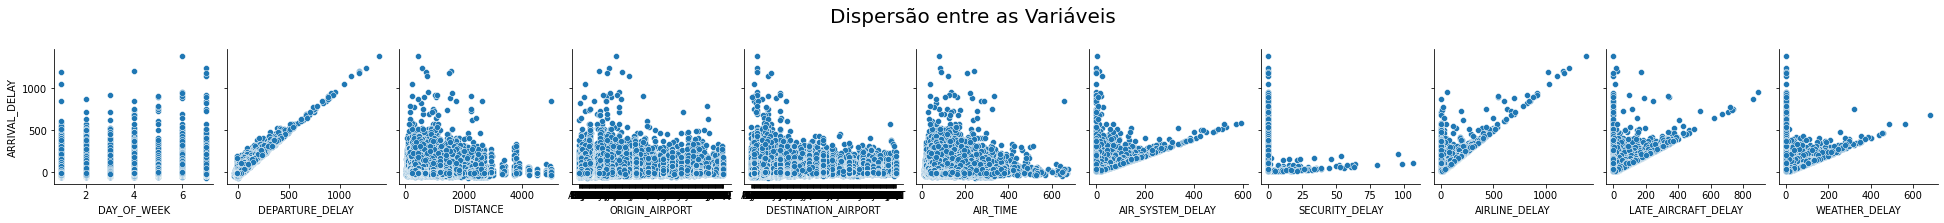

In [26]:
plt.figure(figsize = (12,6))
ax = sns.pairplot(voos, y_vars='ARRIVAL_DELAY',
                  x_vars=['DAY_OF_WEEK', 'DEPARTURE_DELAY', 'DISTANCE', 'ORIGIN_AIRPORT',
                          'DESTINATION_AIRPORT', 'AIR_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]) #kind = reg - traça uma reta de regressao entre as duas variaveis
                  
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.20) 
ax

## Variavel Independente

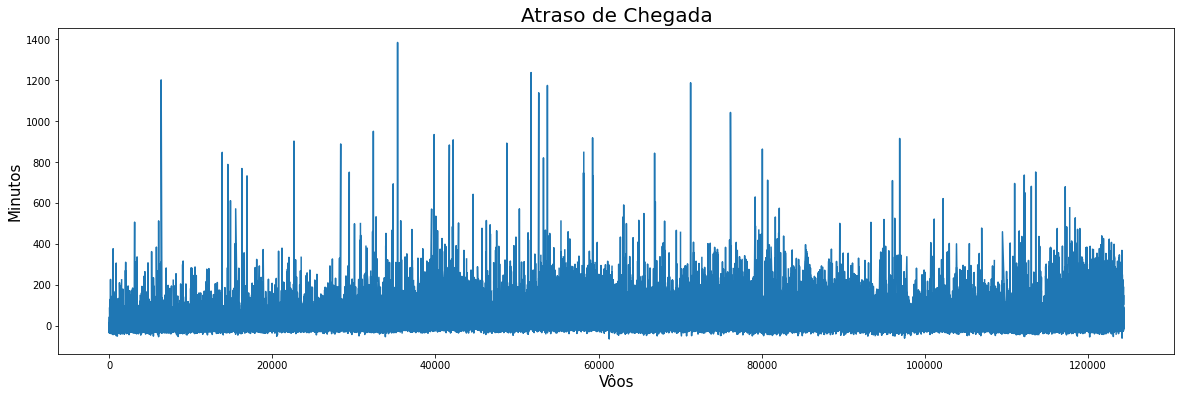

In [27]:
#Plotando a variavel independente

fig, ax = plt.subplots(figsize = (20, 6)) #gera uma tupla com dois objetos

ax.set_title('Atraso de Chegada', fontsize = 20)
ax.set_ylabel('Minutos', fontsize = 15)
ax.set_xlabel('Vôos', fontsize = 15)
ax = voos['ARRIVAL_DELAY'].plot()




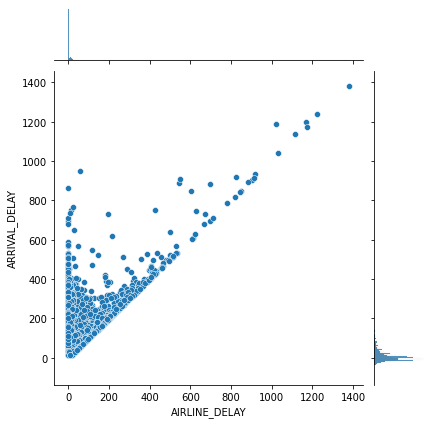

In [28]:
sns.jointplot(data = voos, x="AIRLINE_DELAY", y="ARRIVAL_DELAY")

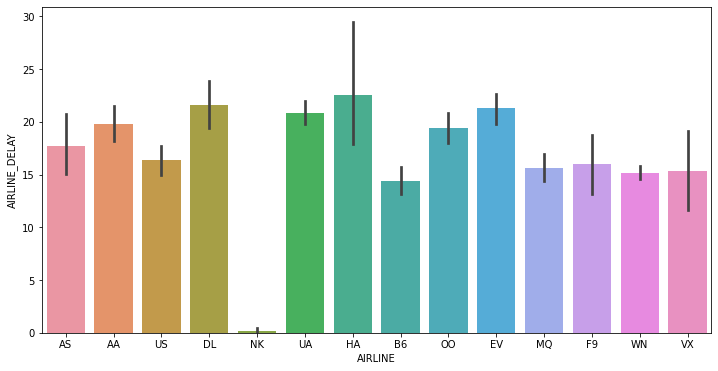

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(data = voos, y = 'AIRLINE_DELAY', x = 'AIRLINE', orient = 'v')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a240c22d0>,
      dtype=object)

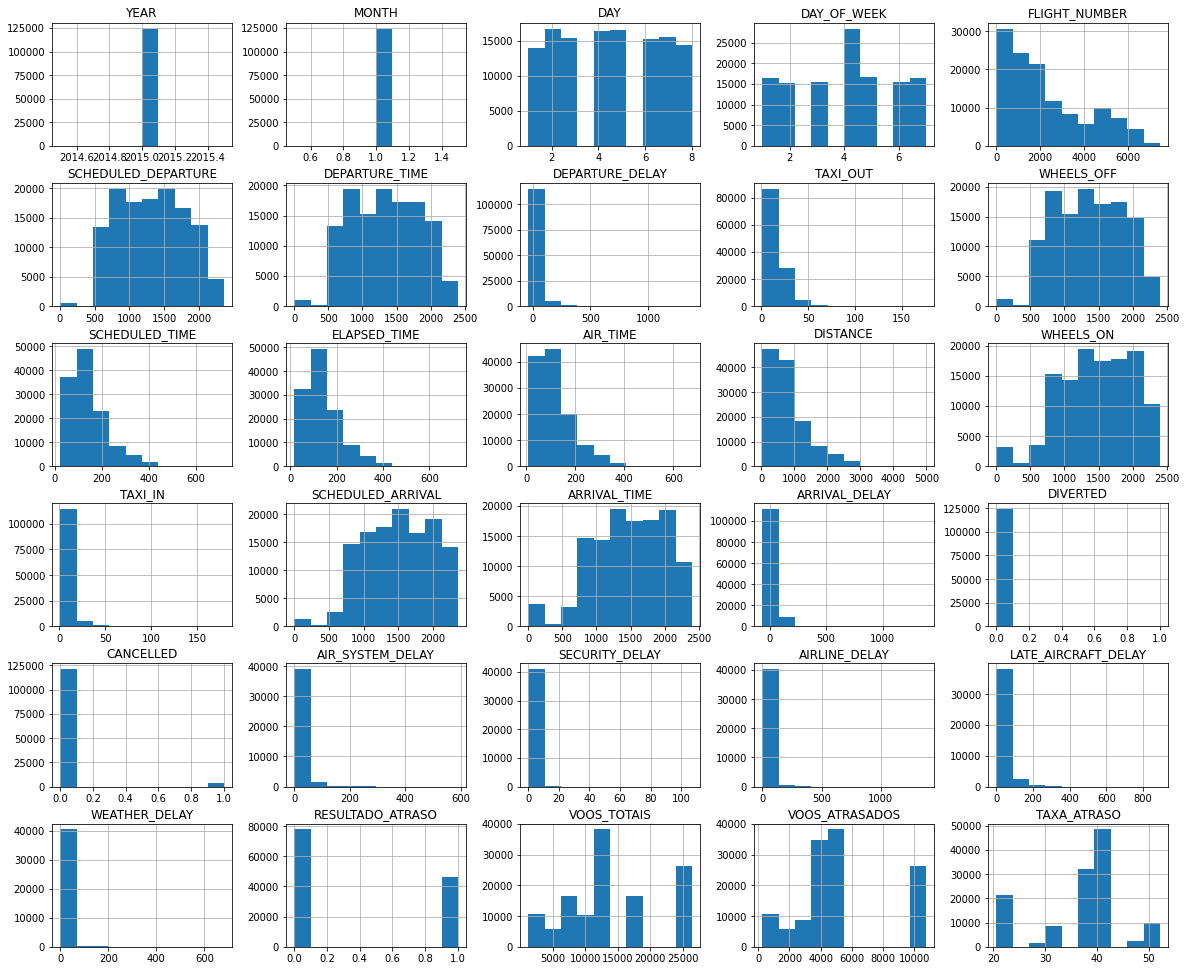

In [31]:
voos.hist(figsize = (20,17))

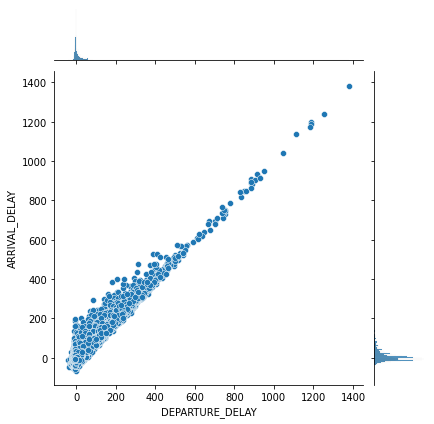

In [32]:
#Relação entre o horário de partida e atraso de chegada
x = 'DEPARTURE_DELAY'
y = 'ARRIVAL_DELAY'
sns.jointplot(data=voos, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY")

In [33]:
companhias = pd.read_csv('airlines.csv')

In [34]:
companhias.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


##Treinando Modelo Linear

In [35]:
#Importando train_test_split

from sklearn.model_selection import train_test_split

In [36]:
voos_modelo = voos[["AIRLINE",'ARRIVAL_DELAY', "DISTANCE", 'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].dropna()

In [37]:
#Pegando uma amostra de 30% do dataset
voos_modelo_sample = voos_modelo[["AIRLINE",'ARRIVAL_DELAY' , "DISTANCE",'RESULTADO_ATRASO', 'TAXA_ATRASO', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]].sample(frac = 0.3, random_state=1)

In [38]:
one_hot = pd.get_dummies(voos_modelo_sample, columns=['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])

In [39]:
one_hot.head()

,ARRIVAL_DELAY,DISTANCE,RESULTADO_ATRASO,TAXA_ATRASO,DEPARTURE_DELAY,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
31817,7.0,622.0,0,41.353887,-4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75594,35.0,922.0,1,52.117512,19.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113527,130.0,969.0,1,40.746359,143.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96425,31.0,187.0,1,42.363137,44.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98051,13.0,229.0,1,38.938445,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
one_hot.shape

(36221, 644)

In [41]:
#criando uma Series pra armazenar a variavel dependente (y)
y = voos_modelo_sample['ARRIVAL_DELAY']

In [42]:
#Criando um dataFrame para armazenar as variaveis explicativas (x)
# X = voos_modelo[['AIRLINE', "DAY_OF_WEEK", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT",'ARRIVAL_DELAY', 'RESULTADO_ATRASO', 'TAXA_ATRASO', "DISTANCE", 'DEPARTURE_DELAY']]

X = one_hot.drop('ARRIVAL_DELAY', axis=1)

In [43]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
modelo = LinearRegression()

In [46]:
#Método Fit para estimar o modelo linear utilizando os dados de treino
modelo.fit(X_train, y_train)

LinearRegression()

In [47]:
#Coeficiente de Determinação (R²): Medida de quanto a linha de regressão se ajusta aos dados

print("R² = {}".format(modelo.score(X_train, y_train)))

R² = 0.9257196673619592


In [48]:
y_predict = modelo.predict(x_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
y_test

77546      0.0
109389    76.0
117128     7.0
9365      -1.0
52540     12.0
          ... 
44907    -13.0
6573      -3.0
62734     10.0
104744    -5.0
13443     20.0
Name: ARRIVAL_DELAY, Length: 10867, dtype: float64

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y_test, y_predict) * 100

23566084.079252694

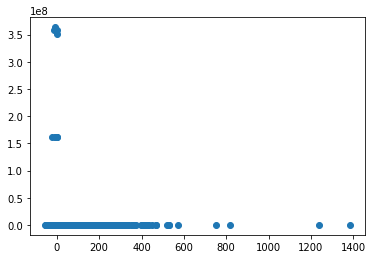

In [53]:
plt.scatter(y_test,y_predict)

In [54]:
y_train

9569     -14.0
8918      51.0
70894     31.0
59256    123.0
20468     39.0
         ...  
93687    -31.0
9882     -19.0
33599    124.0
19363     20.0
55522    -16.0
Name: ARRIVAL_DELAY, Length: 25354, dtype: float64

In [55]:
y_predict

array([ -6.05244064,  92.10246563,  -1.8001709 , ..., -13.10562229,
       -10.22946644,  30.34085608])